###### Algorithm to plot the critical temperature vs the thin films thickness using the values obtained with the algorithm A01a_Magnetization_Curves_k0.1.

In [1]:
%matplotlib inline

# Files management

In [2]:
import glob
import re
import collections

In [3]:
# Glob sirve para buscar archivos
files = {g: sorted(glob.glob('01aTc_k01_%s.txt' % g)) for g in ('0.037', '0.111', '0.333', '1.000')}#, '3.000', '9.000')}
files = collections.OrderedDict(sorted(files.items()))
print(files)
filename = re.compile(r'd(?P<d>\d+)/k[0-9.]+/01aTc_k01_[0-9.].txt')

for gamma, filenames in files.items():
    for file in filenames:
        match = filename.match(file)

OrderedDict([('0.037', ['01aTc_k01_0.037.txt']), ('0.111', ['01aTc_k01_0.111.txt']), ('0.333', ['01aTc_k01_0.333.txt']), ('1.000', ['01aTc_k01_1.000.txt'])])


###### The file '01aTc_k01_gamma.txt' contains the following columns with information
- Thickness
- Critical temperature
- Critical exponents

# Importing Modules 

In [4]:
import numpy as np
from matplotlib import pyplot as plt
from numpy import loadtxt
from scipy.optimize import curve_fit

######  Ploting Critical Temperature vs thickness for each gamma.

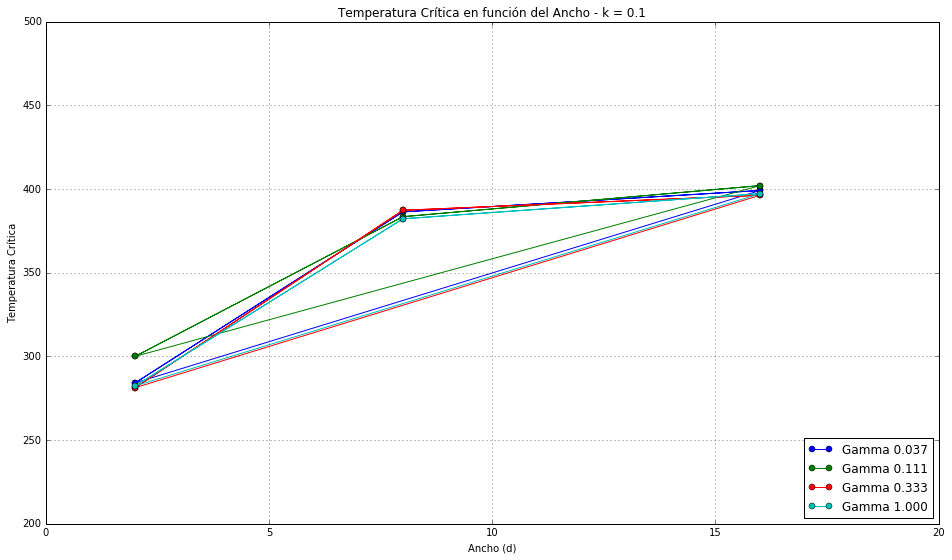

In [5]:
plt.figure(figsize=(16,9))
yerr_data = {}
for fileGamma in files:
    for file in files[fileGamma]:
        Thickness, Tc = loadtxt(file, usecols=(0,1,), unpack=True)
        plt.plot(Thickness, Tc, '-o', label = "Gamma {}".format(fileGamma))
        plt.axis([0, 20, 200, 500])
        
plt.legend(loc=4)
plt.xlabel('Ancho (d)')
plt.ylabel('Temperatura Crítica')
plt.title('Temperatura Crítica en función del Ancho - k = 0.1')
plt.grid(True)
plt.savefig('02ak01_Tc_vs_d.pdf')
plt.show()